In [1]:
from __future__ import division,print_function,absolute_import

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

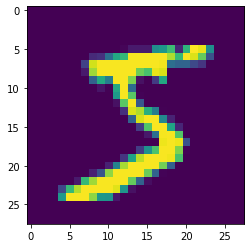

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train=x_train/255
x_test=x_test/255



In [5]:
from tensorflow.keras.callbacks import Callback
class mycallback(Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99):
            print('training has reached 99% accuracy,so training is stopped')
            self.model.stop_training=True

callback=mycallback()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

model=Sequential([])

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(x_train,y_train,epochs=10,callbacks=[callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2000 - accuracy: 0.9409
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0809 - accuracy: 0.9753
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0525 - accuracy: 0.9834
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0385 - accuracy: 0.9877
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0260 - accuracy: 0.9917


In [10]:
history.history['accuracy']


[0.9409, 0.97525, 0.98336667, 0.9877, 0.9917333]

In [11]:
history.history['loss']

[0.19997406971578796,
 0.08094271631886561,
 0.052548206565684326,
 0.0384762571118772,
 0.026026692381617613]

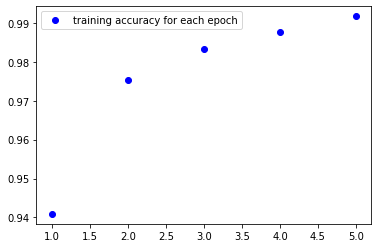

In [12]:
acc=history.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy for each epoch')
plt.legend()
plt.show()

In [14]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0794 - accuracy: 0.9761


[0.0793746491800237, 0.9761]